# Import Data Set

In [2]:
import pandas as pd
import seaborn as sn
data = pd.read_csv("Salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data=data.rename(columns={"YearsExperience":"Exp","Salary":"Salary"})
data

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


there are total 30 records and all are non-null, so no missing values are there

In [10]:
data[data.duplicated()]

,Exp,Salary


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

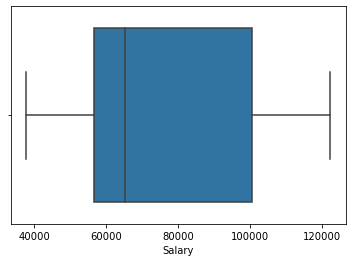

In [11]:
sn.boxplot(data['Salary'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exp'>

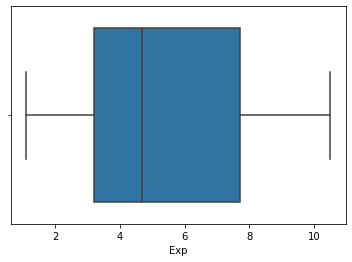

In [12]:
sn.boxplot(data['Exp'])

In [13]:
data.describe()

,Exp,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Min,25%,50%,75% and max are not having heavy differences, so no outliers. Also boxplot is not showing any outliers

In [7]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='Report_salary.html')

# Looking at the report, there is no need of any EDA related work. There are no outliers, duplicate values, so we can go ahead for model

# Correlation

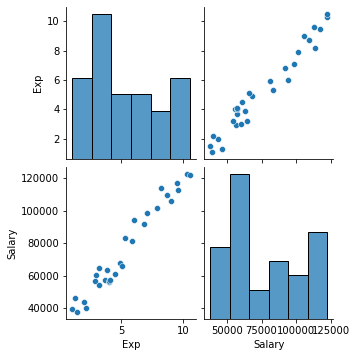

In [14]:
sn.pairplot(data)

In [15]:
data.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


There is a positive correlation between Salary and Years of experience. As the years of experience increases the salary will increase.

0.978242 is high postive correlation

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exp', ylabel='Density'>

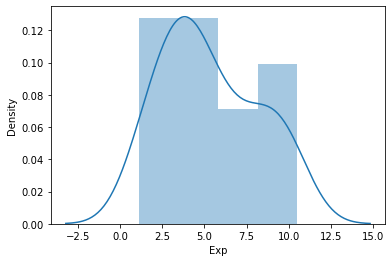

In [16]:
import seaborn as sns
sns.distplot(data['Exp'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

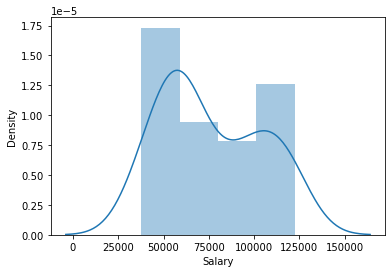

In [17]:
import seaborn as sns
sns.distplot(data['Salary'])

# Fitting a Linear Regression Model

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~Exp",data = data).fit()

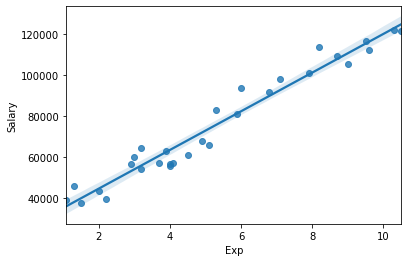

In [20]:
sns.regplot(x="Exp", y="Salary", data=data);

In [21]:
#Coefficients
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict delivery time using sorting time

In [31]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([11,12,13,15,16.5])

In [32]:
data_pred=pd.DataFrame(newdata,columns=['Exp'])

In [33]:
data_pred

,Exp
0,11.0
1,12.0
2,13.0
3,15.0
4,16.5


In [34]:
model.predict(data_pred)

0    129741.785735
1    139191.748056
2    148641.710378
3    167541.635020
4    181716.578503
dtype: float64

## for Exp of 11,12,13,15,16.5 the predicted salaries are 129741.79, 39191.75,148641.71, 167541.64,81716.58 respectively